In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-deep')

# Initialize random number generator
np.random.seed(10)

# True parameter values
alpha_true, sigma = 1, 1
beta_true = 2.5 

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size) + 3

# Simulate outcome variable
Y = alpha_true + beta_true*X1 + np.random.randn(size)*sigma

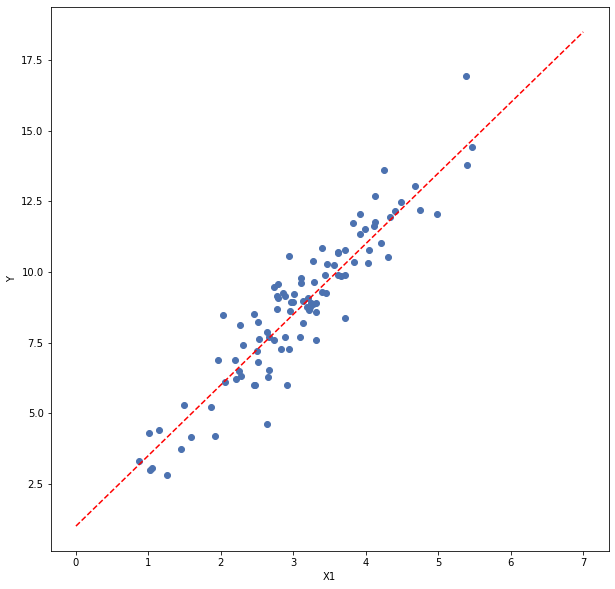

In [8]:
fig, axes = plt.subplots(figsize=(10, 10))

x_true = np.linspace(0, 7, size)
y_true = alpha_true + beta_true*x_true

axes.plot(x_true, y_true, 'r--')

axes.scatter(X1, Y)
axes.set_ylabel('Y'); axes.set_xlabel('X1');

In [9]:
# If you do not have pymc3 already installed uncomment line below and run cell
# !conda install -c conda-forge pymc3

In [6]:
!pip install pymc3


In [10]:
import pymc3 as pm

print('Running on PyMC3 v{}'.format(pm.__version__))

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\raheel zulfiqar\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC3 v3.7


In [11]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Expected value of outcome
    mu = alpha + beta*X1

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)

In [ ]:
with basic_model:
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains:   5%|██▌                                                     | 465/10000 [01:09<28:56,  5.49draws/s]

In [ ]:
pm.traceplot(trace);

In [ ]:
pm.summary(trace).round(2)
#Alpha = 1, Beta = 2.5

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

x_true = np.linspace(0, 7, size)
y_true = alpha_true + beta_true*x

trace_points = list(trace.points())

for _ in range(1000):
    points = np.random.choice(trace_points)
    alpha, beta = points['alpha'], points['beta']
    x = np.linspace(0, 7, size)
    y = alpha + beta*x
    ax.plot(x, y, alpha=.07, color='gray')
    
    
#Data
ax.scatter(X1, Y, marker='x')

#True trend
ax.plot(x_true, y_true,'r--');